In [ ]:
############################################## Importing Libraries ##############################################

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
############################################## Data Loading Starts Here #############################################

In [2]:
df_tr = pd.read_csv('Flight_Passenger_Satisfaction.csv')

In [3]:
df_tr.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
############################################## Data Preparation Starts Here #############################################

In [4]:
dupl = df_tr.groupby(['id']).size()>1
dupl.value_counts()
#Checking that there are no duplicates (no values that are true)

False    103904
dtype: int64

In [5]:
df_tr = df_tr.drop(['id'], axis = 1) #Further dropping un-needed attribute

In [31]:
df_tr.isnull().sum()

Unnamed: 0                           0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [32]:
df_tr['satisfaction'].unique()

array([0, 1], dtype=int64)

In [6]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [33]:
df_tr['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

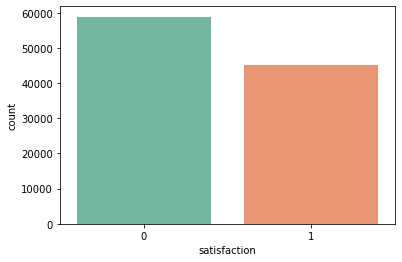

In [34]:
sns.countplot(x='satisfaction',data=df_tr,palette='Set2')
plt.show()

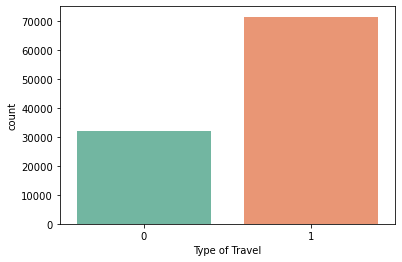

In [35]:
sns.countplot(x='Type of Travel',data=df_tr,palette='Set2')
plt.show()

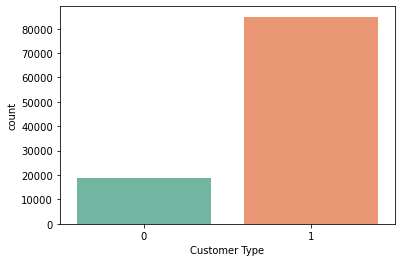

In [36]:
sns.countplot(x='Customer Type',data=df_tr,palette='Set2')
plt.show()

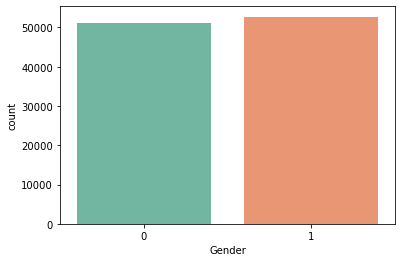

In [37]:
sns.countplot(x='Gender',data=df_tr,palette='Set2')
plt.show()

In [10]:

df_tr['Gender'] = df_tr['Gender'].replace({"Male": 0, "Female": 1})
df_tr['satisfaction'] = df_tr['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1})
df_tr['Type of Travel'] = df_tr['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
df_tr['Customer Type'] = df_tr['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
df_tr['Class'] = df_tr['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
df_tr

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,1,13,0,1,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,0,25,1,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,1,1,26,1,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,1,1,25,1,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,0,1,61,1,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,1,0,23,1,0,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,0,1,49,1,2,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,0,0,30,1,2,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,1,0,22,1,0,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [39]:
df_tr.groupby(['Class', 'Gender'])['satisfaction'].count()

Class  Gender
0      0         22887
       1         23858
1      0          3552
       1          3942
2      0         24738
       1         24927
Name: satisfaction, dtype: int64

C:\Softwares\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

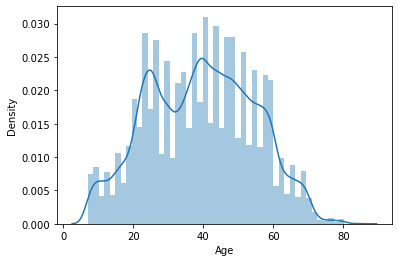

In [40]:
sns.distplot(df_tr['Age'])

C:\Softwares\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

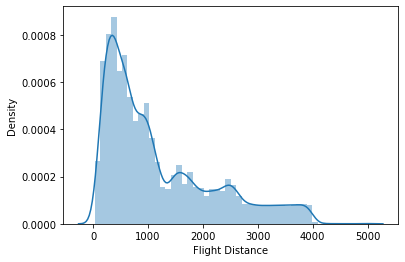

In [41]:
sns.distplot(df_tr['Flight Distance'])

In [42]:
corr_matrix = df_tr.corr()
corr_matrix

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
Unnamed: 0,1.000000,-0.003978,0.002844,0.004786,-0.000856,0.000798,0.002794,-0.002490,0.000739,0.001913,...,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,0.000590,-0.004731
Gender,-0.003978,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,...,0.026502,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.000802,-0.012211
Customer Type,0.002844,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,...,0.159484,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004459,0.187638
Age,0.004786,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,...,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.012137,0.137167
Type of Travel,-0.000856,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,...,0.124399,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.005086,0.449000
Class,0.000798,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,...,0.227444,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,-0.013682,0.494471
Flight Distance,0.002794,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,...,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,-0.002154,0.298780
Inflight wifi service,-0.002490,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,...,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.019038,0.284245
Departure/Arrival time convenient,0.000739,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,...,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.000645,-0.051601
Ease of Online booking,0.001913,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,...,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.008051,0.171705


In [43]:
df_tr.dtypes

Unnamed: 0                             int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Arrival Delay in Minutes             float64
satisfacti

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>],
       [<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>],
       [<AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSub

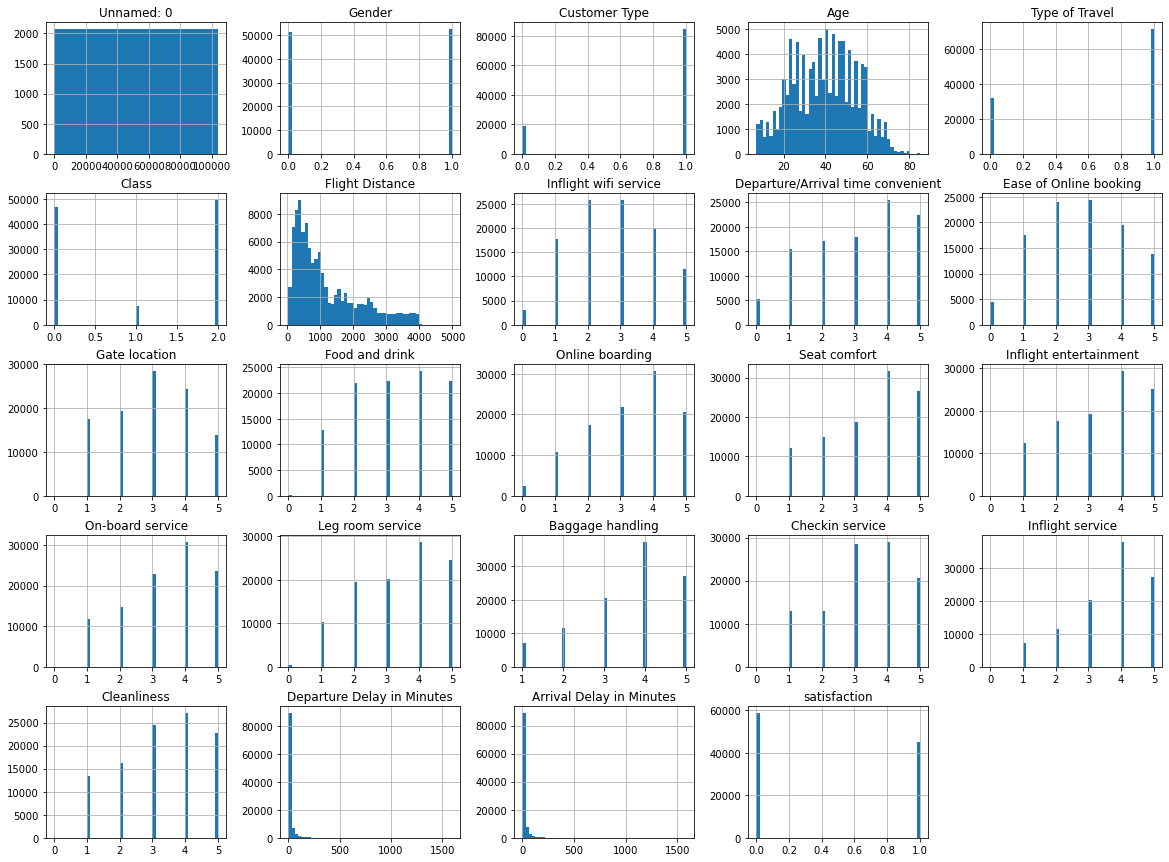

In [13]:
df_tr.hist(bins=50, figsize=(20,15))

In [45]:
df_tr.drop(columns=['Arrival Delay in Minutes'], inplace=True)

In [51]:
df_corr = df_tr.corr()
df_corr

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Unnamed: 0,1.000000,-0.003978,0.002844,0.004786,-0.000856,0.000798,0.002794,-0.002490,0.000739,0.001913,...,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.004731
Gender,-0.003978,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,...,0.042260,0.026502,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.012211
Customer Type,0.002844,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,...,0.189262,0.159484,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,0.187638
Age,0.004786,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,...,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,0.137167
Type of Travel,-0.000856,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,...,0.224803,0.124399,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.449000
Class,0.000798,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,...,0.322924,0.227444,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,0.494471
Flight Distance,0.002794,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,...,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.298780
Inflight wifi service,-0.002490,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,...,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,0.284245
Departure/Arrival time convenient,0.000739,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,...,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.051601
Ease of Online booking,0.001913,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,...,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,0.171705


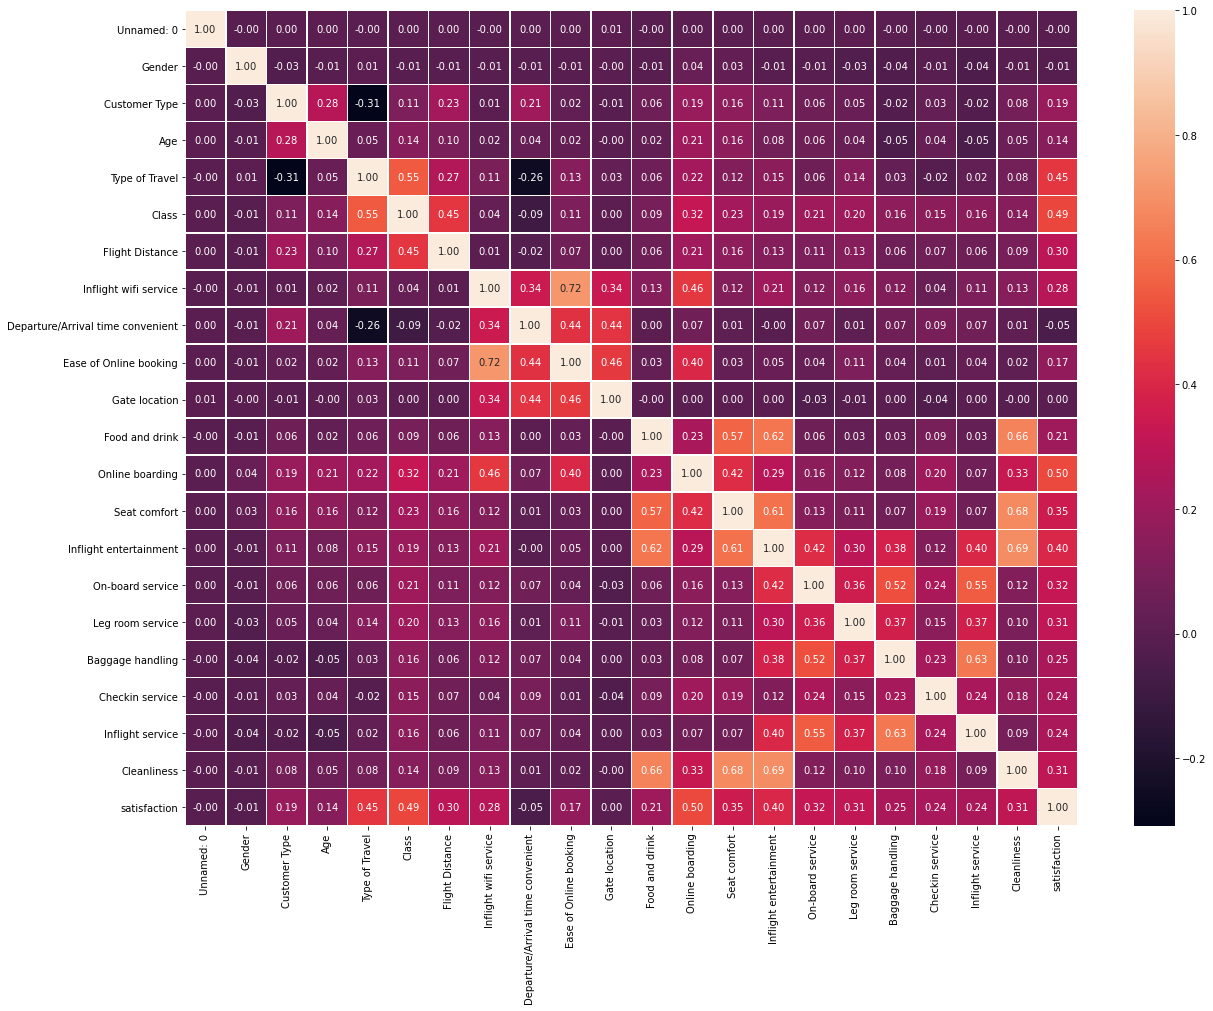

In [52]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, linewidth=".5", fmt=".2f")
plt.show()

In [ ]:
###################################################### MODELING ###########################################

In [ ]:
################################################### DECISION TREE  ###################################################

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf = DecisionTreeClassifier(max_depth=12)

In [55]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [56]:
y_pred = clf.predict(X_test)

In [60]:
importances = clf.feature_importances_
importances

array([2.69691982e-03, 1.42843565e-04, 4.43380727e-02, 8.04834639e-03,
       1.66254621e-01, 2.10628669e-02, 4.15217930e-03, 1.97663672e-01,
       1.63069050e-03, 1.16158798e-03, 1.30133425e-02, 3.86421442e-04,
       4.07969915e-01, 9.82952384e-03, 5.07208908e-02, 2.76355514e-03,
       6.45769688e-03, 1.33262962e-02, 2.60375656e-02, 1.08692163e-02,
       7.12584287e-03, 4.34793291e-03])

In [61]:
features = np.array(df_tr.columns)

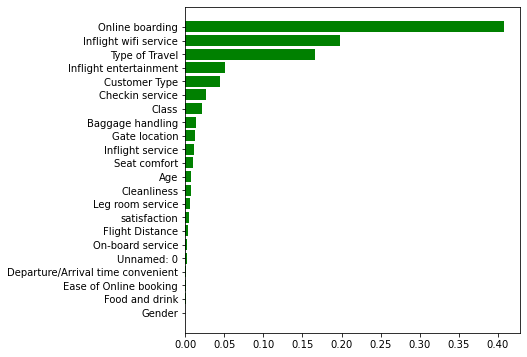

In [87]:
factor = np.argsort(importances)
plt.figure(figsize=(6,6))
plt.barh(range(len(factor)), importances[factor], color='g', align='center')
plt.yticks(range(len(factor)), features[factor])
plt.show()

In [ ]:
#### EVALUATION

In [72]:
#Show the confusion matrix for each model with Recall and Precision
# Plot the confusion matrix for each model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , recall_score ,  precision_score
#get_confusion_matrix(clf)
precision = precision_score(y_test, clf.predict(X_test), average='binary')
recall = recall_score(y_test, clf.predict(X_test), average='binary')
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))

Avg Precision:0.9589231840334185
Avg Recall:0.9192436040044494


In [73]:
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
2090.5509/(max(y)-min(y))
metrics.r2_score(y_test, y_pred)

MAE: 0.05196804927340968
MSE: 0.05196804927340968
RMSE: 0.2279650176527304


0.788279001393075

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9480319507265903

In [ ]:
############################################## Support Vector Classifier  ###################################################

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
yhat=svc.predict(X_test)

In [76]:
accuracy_score(y_test,yhat)

0.9478394764700221

<AxesSubplot:>

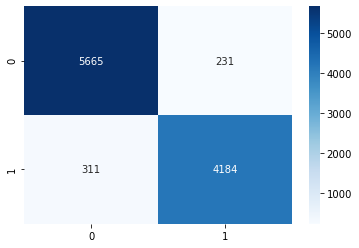

In [88]:
sns.heatmap(confusion_matrix(y_test,yhat),cmap='Blues',annot=True, fmt='.0f')

In [82]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5896
           1       0.95      0.93      0.94      4495

    accuracy                           0.95     10391
   macro avg       0.95      0.95      0.95     10391
weighted avg       0.95      0.95      0.95     10391



In [83]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average='weighted')

0.9477810532626959

In [86]:
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, yhat))
print('MSE:', metrics.mean_squared_error(y_test, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))
2090.5509/(max(y)-min(y))
print('RMSE:',metrics.r2_score(y_test, yhat))

MAE: 0.05216052352997787
MSE: 0.05216052352997787
RMSE: 0.2283867849285021
RMSE: 0.7874948495463827


In [ ]:
####################################################### END :) ##########################################################